In [1]:
import torch
from AHP_Dataset import AHP_Dataset as AHP
from custom_models.SS_v1 import SS_v1
import SupervisedMLFramework as sml
import matplotlib.pyplot as plt

TRAIN_MAPPING = "data\\AHP\\train_annotations.pkl"
TEST_MAPPING = "data\\AHP\\test_annotations.pkl"
IMG_DIR = "data\\AHP\\AHP\\train\\Processed_Images"
GT_DIR = "data\\AHP\\AHP\\train\\Processed_Annotations"

In [2]:
file_path = "C:\\Users\\sayba\\Documents\\University\\Spring_2023_T8\\1896\\human_segmentation\\checkpoints\\test1\\initial_test.pt"

model_save = torch.load(file_path)

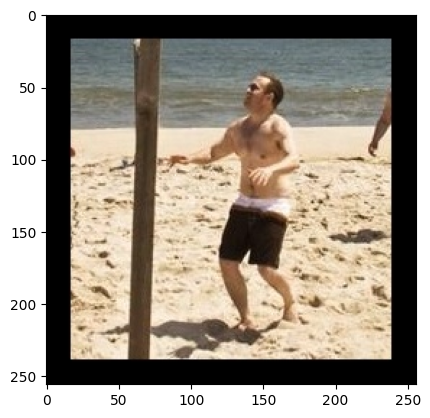

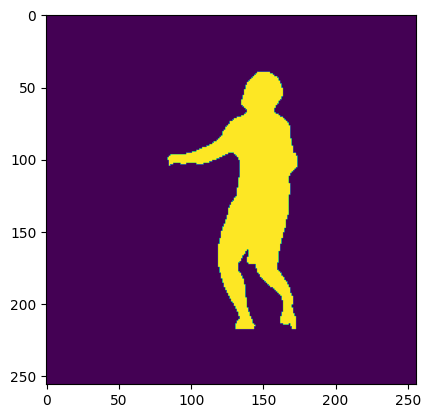

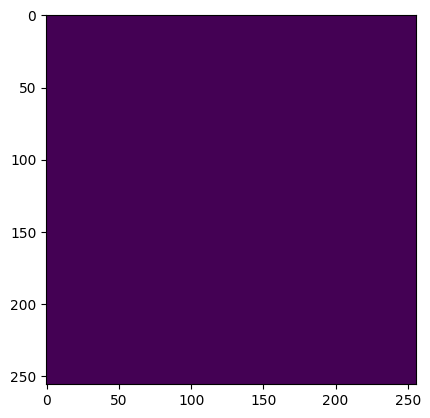

In [3]:
model = SS_v1()
model.load_state_dict(model_save['model_state_dict'])
test_dataset = AHP(TEST_MAPPING, IMG_DIR, GT_DIR)

X, y = test_dataset[0]

plt.imshow(X.permute(1,2,0))
plt.show()
plt.imshow(y)
plt.show()

X = torch.unsqueeze(X, dim=0)
y = torch.unsqueeze(y, dim=0)

model = sml.SupervisedMLFramework("eval", model, None, None, batch_size=64)

pred = model.predict(X)
plt.imshow(pred)
plt.show()